In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from sympy import solve, linsolve, symbols, Matrix, Eq
import ipywidgets as widgets

In [2]:
A = np.array([[3, -9], [2, 4]])
b = np.array([-42, 2])
 
ans1 = np.linalg.inv(A).dot(b)
 
print('A=\n',A)
print('b=',b)
print('solution=',ans1)

A=
 [[ 3 -9]
 [ 2  4]]
b= [-42   2]
solution= [-5.  3.]


In [3]:
def B_exciton_function(y_B_ex, y_B_De, y_B_r):
    B = 1/(1+2*y_B_ex/(y_B_De+y_B_r))
    return B

def A_exciton_function(y_B_ex, y_B_De, y_B_r, y_A_ex, y_A_r):
    A = 1/(1+2*(y_A_ex/y_A_r))*(-1)*B_exciton_function(y_B_ex, y_B_De, y_B_r)
    return A

In [18]:
y_B_exmulti = widgets.FloatSlider(value=10, min=0., max=10, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_B_ex_multiplier')
y_B_Demulti = widgets.FloatSlider(value=1, min=0., max=10, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_B_De_multiplier')
# y_B_rmulti   = widgets.FloatSlider(value=10,  min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_A_exmulti   = widgets.FloatSlider(value=10,   min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_A_exmultiplier')
y_A_rmulti  = widgets.FloatSlider(value=1,min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_A_rmultiplier')

y_B_r = 1

G_B_K = 1

def need(y_B_exmulti, y_B_Demulti, y_A_exmulti, y_A_rmulti):
    fig, ax = plt.subplots(figsize=(8.25, 5), dpi=120)
    
    y_B_ex = y_B_exmulti * y_B_r
    # y_B_De = y_B_Demulti * y_B_r
    y_A_ex = y_A_exmulti * y_B_r
    y_A_r  = y_A_rmulti  * y_B_r
    
    globals()['ADoVP'] = []
    globals()['BDoVP'] = []
    for y_B_De in np.linspace(0.00001, 10, 30):
        
        A = np.array([[-(y_B_ex+y_B_De+y_B_r), y_B_ex, 0, 0], 
                      [y_B_ex, -(y_B_ex+y_B_De+y_B_r), 0, 0], 
                      [0, y_B_De, -(y_A_ex+y_A_r), y_A_ex], 
                      [y_B_De, 0, y_A_ex, -(y_A_ex+y_A_r)]])
        # print('for 𝛾_{𝐵,𝐾𝐾′}^{𝐷𝑒𝑥𝑡𝑒𝑟}/𝛾_{𝐵,𝑟}^𝑋 =',y_B_De ,' the matrix A is\n',A)
        b = np.array([-G_B_K, 0, 0, 0])
        # print('and the matrix b is\n',b,'\n----------------------------')
    
        ans1 = np.linalg.inv(A).dot(b)
        # print("N^B_K:",ans1[0],"\nN^B_K':",ans1[1], "\nN^A_K:",ans1[2],"\nN^A_K':",ans1[3])
        DoVP_of_B = (ans1[0]-ans1[1])/(ans1[0]+ans1[1]) # print("B exciton DoVP = ",BDoVP)
        DoVP_of_A = (ans1[2]-ans1[3])/(ans1[2]+ans1[3]) # print("A exciton DoVP = ",ADoVP)
        
        globals()['BDoVP'] += [DoVP_of_B]
        globals()['ADoVP'] += [DoVP_of_A]

    y_B_De = np.linspace(0.00001, 10, 30)
    ax.plot( y_B_De, globals()['BDoVP'], 'bX', markeredgecolor='k', markersize=7.5, zorder=3)
    ax.plot( y_B_De, globals()['ADoVP'], 'rX', markeredgecolor='k', markersize=7.5, zorder=3)
    
    ax.plot( np.linspace(0, 10, 10000) , B_exciton_function(y_B_ex, np.linspace(0, 10, 10000), y_B_r), linestyle='solid', color='blue' ,linewidth=2.5, zorder=2)
    ax.plot( np.linspace(0, 50, 10000) , A_exciton_function(y_B_ex, np.linspace(0, 50, 10000), y_B_r, y_A_ex, y_A_r), linestyle='dashed', color='red' ,linewidth=2.5, zorder=2)
    
    size = 25
    # ax.set_title('analytic result', fontsize=size)
    ax.grid()
    # ax.set_ylabel("$𝜂^𝐵$", fontsize=size-3, rotation=90)
    # ax.set_ylabel("$𝜂^𝐴$", fontsize=size-3, rotation=90)
    # ax.set_yticks(np.arange(0, 1.01, 1./5))
    # ax.set_yticks(np.arange(0, 1.01, 1./10), minor=True)
    # ax.set_ylim(0, 1)
    # ax.set_xticks(np.arange(0, 10.01, 1))
    # ax.set_xlim(0, 10)
    # ax.set_yticks(np.arange(-1, 0.01, 1./5))
    # ax.set_yticks(np.arange(-1, 0.01, 1./10), minor=True)
    # ax.set_ylim(-1, 0)
    # ax.set_xticks(np.arange(0, 10.01, 1))
    # ax.set_xlim(0, 10)
    ax.set_ylabel("DoVP", fontsize=size-3, rotation=90)
    ax.set_yticks(np.arange(-1, 1.01, 2./5))
    ax.set_yticks(np.arange(-1, 1.01, 2./10), minor=True)
    ax.set_ylim(-1, 1)
    ax.set_xticks(np.arange(0, 10.01, 1))
    ax.set_xlim(0, 10)
    ax.set_xlabel('$𝛾_{𝐵,𝐾𝐾′}^{𝐷𝑒𝑥𝑡𝑒𝑟}/𝛾_{𝐵,𝑟}^𝑋$', fontsize=size)
    ax.tick_params(axis='both', which='major', labelsize=20)
    # ax.legend(['numerical', 'analytic'], fontsize=16, loc='lower left')
    ax.legend(["numerical $𝜂^𝐵$", "numerical $𝜂^𝐴$", "$𝜂^𝐵$", "$𝜂^𝐴$"], fontsize=12, loc='lower left')
    plt.tight_layout(pad=3.1)
    plt.show() 


out = widgets.interactive_output(need, {'y_B_exmulti':y_B_exmulti, 'y_B_Demulti':y_B_Demulti, 'y_A_exmulti':y_A_exmulti, 'y_A_rmulti':y_A_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_B_exmulti, y_B_Demulti, y_A_exmulti, y_A_rmulti]) ])
display(ui , out )

Output()

In [19]:
y_B_exmulti = widgets.FloatSlider(value=10, min=0., max=10, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_B_ex_multiplier')
y_B_Demulti = widgets.FloatSlider(value=7, min=0., max=10, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_B_De_multiplier')
# y_B_rmulti   = widgets.FloatSlider(value=10,  min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_A_exmulti   = widgets.FloatSlider(value=10,   min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_A_exmultiplier')
y_A_rmulti  = widgets.FloatSlider(value=1,min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_A_rmultiplier')

y_B_r = 1

G_B_K = 1

def need(y_B_exmulti, y_B_Demulti, y_A_exmulti, y_A_rmulti):
    fig, ax = plt.subplots(figsize=(6.3, 5), dpi=120)
    # fig, ax = plt.subplots(figsize=(7.25, 5), dpi=120)
    y_B_ex = y_B_exmulti * y_B_r
    y_B_De = y_B_Demulti * y_B_r
    y_A_ex = y_A_exmulti * y_B_r
    # y_A_r  = y_A_rmulti  * y_B_r
    
    globals()['ADoVP'] = []
    globals()['BDoVP'] = []
    for y_A_r in np.linspace(0.1, 10, 30):
        
        A = np.array([[-(y_B_ex+y_B_De+y_B_r), y_B_ex, 0, 0], 
                      [y_B_ex, -(y_B_ex+y_B_De+y_B_r), 0, 0], 
                      [0, y_B_De, -(y_A_ex+y_A_r), y_A_ex], 
                      [y_B_De, 0, y_A_ex, -(y_A_ex+y_A_r)]])
        # print('for 𝛾_{𝐴,𝑟}^𝑋/𝛾_{𝐵,𝑟}^𝑋 =', y_A_r,'\nand 𝛾_{𝐵,𝐾𝐾′}^{𝐷𝑒𝑥𝑡𝑒𝑟}/𝛾_{𝐵,𝑟}^𝑋=', y_B_De,'\nthe matrix A is\n',A)
        b = np.array([-1, 0, 0, 0])
        # print('and the matrix b is\n',b,'\n----------------------------')
    
        ans1 = np.linalg.inv(A).dot(b)
        # print("N^B_K:",ans1[0],"\nN^B_K':",ans1[1], "\nN^A_K:",ans1[2],"\nN^A_K':",ans1[3])
        DoVP_of_B = (ans1[0]-ans1[1])/(ans1[0]+ans1[1]) # print("B exciton DoVP = ",BDoVP)
        DoVP_of_A = (ans1[2]-ans1[3])/(ans1[2]+ans1[3]) # print("A exciton DoVP = ",ADoVP)
        
        globals()['BDoVP'] += [DoVP_of_B]
        globals()['ADoVP'] += [DoVP_of_A]

    y_A_r = np.linspace(0.1, 10, 30)
    ax.plot( y_A_r, globals()['BDoVP'], 'bX', markeredgecolor='k', markersize=6, zorder=3)
    ax.plot( y_A_r, globals()['ADoVP'], 'rX', markeredgecolor='k', markersize=6, zorder=3)
    
    ax.plot( np.linspace(0.1, 10, 10000) , B_exciton_function(y_B_ex, y_B_De , y_B_r)*(1+0*np.linspace(0.1, 10, 10000)), linestyle='solid', color='blue' ,linewidth=2.5, zorder=2)
    ax.plot( np.linspace(0.1, 10, 10000) , A_exciton_function(y_B_ex, y_B_De, y_B_r, y_A_ex, np.linspace(0.1, 10, 10000)), linestyle='dashed', color='red' ,linewidth=2.5, zorder=2)
    
    # ax.set_title('$𝛾_{𝐵,𝐾𝐾′}^{𝐷𝑒𝑥𝑡𝑒𝑟}=5 𝛾_{𝐵,𝑟}^𝑋$', fontsize=30)
    ax.grid()
    # ax.set_ylabel("$𝜂^𝐵$", fontsize=size-3, rotation=90)
    # ax.set_ylabel("$𝜂^𝐴$", fontsize=size-3, rotation=90)
    # ax.set_yticks(np.arange(0, 1.01, 1./5))
    # ax.set_yticks(np.arange(0, 1.01, 1./10), minor=True)
    # ax.set_ylim(0, 1)
    # ax.set_xticks(np.arange(0, 10.01, 1))
    # ax.set_xlim(0, 10)
    # ax.set_yticks(np.arange(-1, 0.01, 1./5))
    # ax.set_yticks(np.arange(-1, 0.01, 1./10), minor=True)
    # ax.set_ylim(-1, 0)
    # ax.set_xticks(np.arange(0, 10.01, 1))
    # ax.set_xlim(0, 10)
    # ax.set_ylabel("DoVP", fontsize=22, rotation=90)
    # ax.set_yticks(np.arange(-1, 1.01, 2./5))
    ax.set_yticks(np.arange(-1, 1.01, 2./5), [' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_yticks(np.arange(-1, 1.01, 2./10), minor=True)
    ax.set_ylim(-1, 1)
    ax.set_xticks(np.append([0.1], np.linspace(1, 10, 10)), [ '0.1',  '1' ,  '2' ,  '3' ,  '4' ,  '5' ,  '6' ,  '7' ,  '8' ,  '9' , '10' ])
    ax.set_xlim(0.1, 10)
    ax.set_xlabel('$𝛾_{𝐴,𝑟}^𝑋/𝛾_{𝐵,𝑟}^𝑋$', fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=20)
    # ax.legend(['numerical', 'analytic'], fontsize=16, loc='lower left')
    ax.legend(["numerical $𝜂^𝐵$", "numerical $𝜂^𝐴$", "$𝜂^𝐵$", "$𝜂^𝐴$"], fontsize=12, loc='lower right')
    plt.tight_layout(pad=3.1)
    plt.show() 


out = widgets.interactive_output(need, {'y_B_exmulti':y_B_exmulti, 'y_B_Demulti':y_B_Demulti, 'y_A_exmulti':y_A_exmulti, 'y_A_rmulti':y_A_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_B_exmulti, y_B_Demulti, y_A_exmulti, y_A_rmulti]) ])
display(ui , out )

Output()

In [6]:
np.append([0.1], np.linspace(1, 10, 10))

array([ 0.1,  1. ,  2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. ])

# Model-I 

In [7]:
def model_one_WP_function(l, y_l0_KK, y_X_r):
    y_l0_KK = y_l0_KK*(np.abs(l)+1)
    WP_TH = 1/(1+2*y_l0_KK/(y_X_r))
    return WP_TH

def model_two_WP_function(l, y_l0_KK, y_X_r, y_X_f):
    y_l0_KK = y_l0_KK*(np.abs(l)+1)
    alpha = 1/(1+2*y_l0_KK/(y_X_r+y_X_f))
    WP = alpha * 1
    return WP

def model_two_LOW_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f):
    LOW = 1/(1+2*y_X0_KK/y_X_r) * model_two_WP_function(l, y_l0_KK, y_X_r, y_X_f)
    return LOW

def model_two_Both_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f):
    Both = (y_X_f/(y_X_r+y_X_f))*model_two_LOW_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f) + (y_X_r/(y_X_r+y_X_f))*model_two_WP_function(l, y_l0_KK, y_X_r, y_X_f) 
    return Both

def model_three_WP_function(l, y_l0_KK, y_X_r, y_X_f, y_T_f):
    y_l0_KK = y_l0_KK*(np.abs(l)+1)
    WP = 1/(1+2*y_l0_KK/(y_X_r+y_X_f+y_T_f))
    return WP

def model_three_LOW_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f):
    LOW = 1/(1+2*y_X0_KK/(y_X_r+y_T_f)) * model_three_WP_function(l, y_l0_KK, y_X_r, y_X_f, y_T_f)
    return LOW

def model_three_Both_exciton_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f):
    Both = ((y_X_f/y_X_r)/(1+y_X_f/y_X_r+y_T_f/y_X_r))*model_three_LOW_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f) + ((1+y_T_f/y_X_r)/(1+y_X_f/y_X_r+y_T_f/y_X_r))*model_three_WP_function(l, y_l0_KK, y_X_r, y_X_f, y_T_f) 
    return Both

def model_three_Both_exciton_fun_formation_use(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f):
    Both = ((y_X_f/y_T_f)/(1+y_X_f/y_T_f+y_X_r/y_T_f))*model_three_LOW_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f) + ((1+y_X_r/y_T_f)/(1+y_X_f/y_T_f+y_X_r/y_T_f))*model_three_WP_function(l, y_l0_KK, y_X_r, y_X_f, y_T_f) 
    return Both

def model_three_trion_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r):
    onlyTR =  1/(1+2*y_T_KK/y_T_r) * model_three_Both_exciton_fun_formation_use(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f)
    # onlyTR =  model_three_Both_exciton_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f)
    return onlyTR

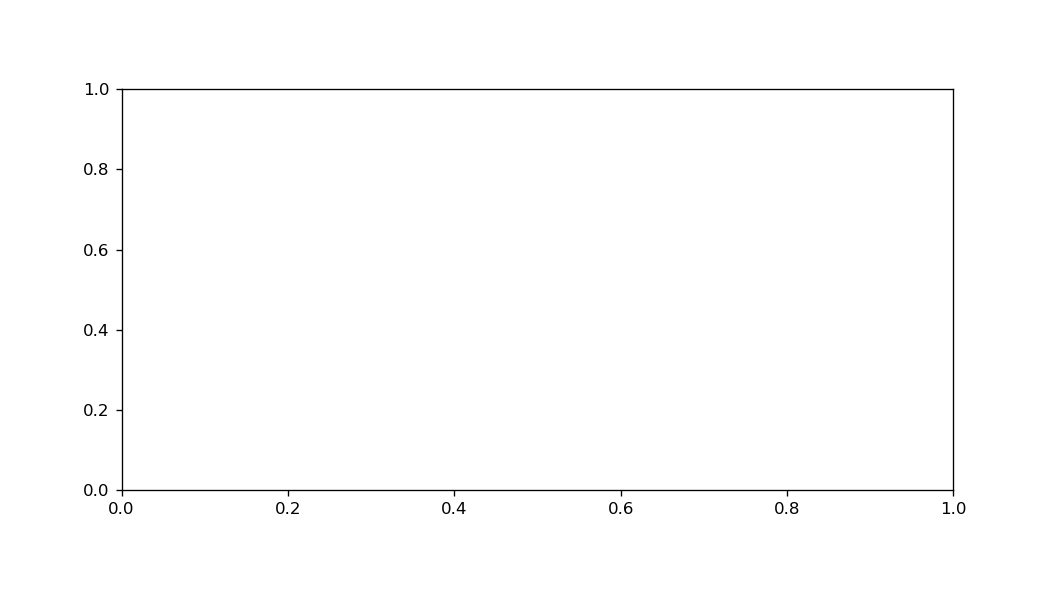

Output()

In [8]:
#創建畫布
fig, ax = plt.subplots(figsize=(8.75, 5), dpi=120)
#參數設置(滑桿)
y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X_r = 1
    
def need(y_l0_KKmulti):
    #清空畫面
    ax.cla()
    #參數導入
    y_l0_KK = y_l0_KKmulti * y_X_r
    # print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))

    
    #數值解
    globals()['DoVP'] = []
    for l in np.linspace(0, 6, 7):
        A = np.array([[-(y_l0_KK*(np.abs(l)+1)+y_X_r), y_l0_KK*(np.abs(l)+1)],
                      [y_l0_KK*(np.abs(l)+1), -(y_l0_KK*(np.abs(l)+1)+y_X_r)]])
        print('for l = ',l, '\nthe matrix A is\n',A)
        b = np.array([-1, 0])
        print('and the matrix b is\n',b,'\n----------------------------')
        ans = np.linalg.inv(A).dot(b)
        DoVP_solution = (ans[0]-ans[1])/(ans[0]+ans[1])
        globals()['DoVP'] += [DoVP_solution]
    #繪製數值解
    ax.plot( np.linspace(0, 6, 7), globals()['DoVP'], 'kx', markersize=10, zorder=3)
    
    
    #解析解
    globals()['WP'] = []
    for l in range(0,7,1):
        globals()['WP'] += [model_one_WP_function(l, y_l0_KK, y_X_r)]
    #繪製解析解
    ax.plot( np.linspace(0, 6, 7), globals()['WP'], marker='v', linestyle='solid', markersize=8, color='red' ,linewidth=1, zorder=2)
    #標上資料點
    for j, v in enumerate(globals()['WP']):
        ax.text(j, v-0.09, "%2.2f" %v, ha="center", fontsize=20)


    #圖片設置
    ax.grid()
    # ax.set_title('Model I', fontsize=20)
    ax.set_ylabel("Exciton DoVP", fontsize=20, rotation=90)
    ax.set_yticks(np.arange(0, 1.01, 1./10))
    ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    ax.set_ylim(0, 1)
    ax.set_xlim(-0.5, 6.5)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(0, 6, 7), [' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(0, 6, 7), ['0', '1', '2', '3', '4', '5', '6'])
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.legend(['numerical η$^{X,\ell}_{\sf{Model-I}}$ ','η$^{X,\ell}_{\sf{Model-I}}$'], fontsize=16, loc='lower left')


        
plt.tight_layout(pad=5)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti]) ])
display(ui , out )

# Model-II

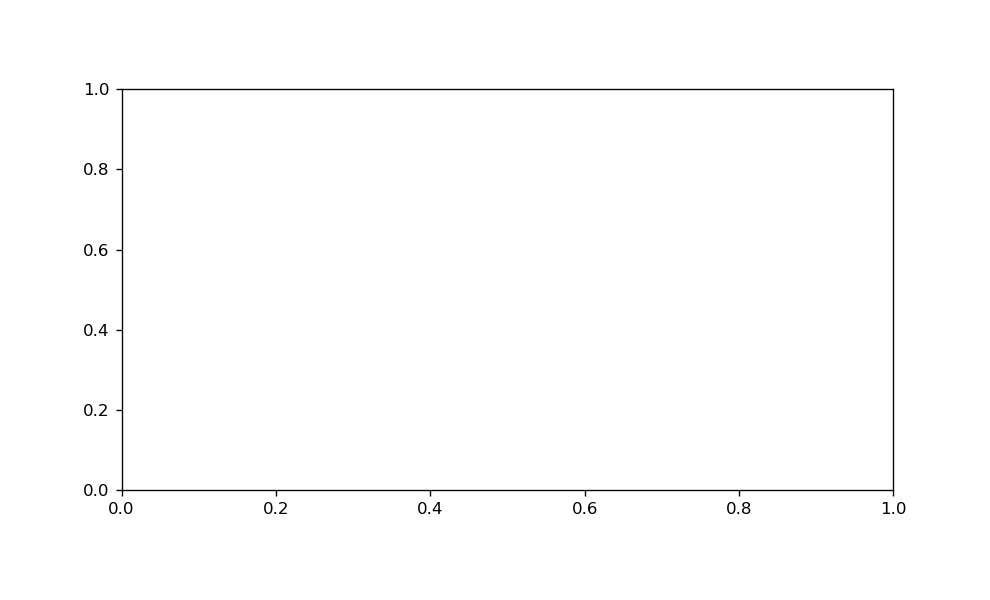

Output()

In [13]:
fig, ax = plt.subplots(figsize=(8.25, 5), dpi=120)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_T_fmulti   = widgets.FloatSlider(value=1,   min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
y_T_KKmulti  = widgets.FloatSlider(value=0.01,min=0., max=0.02, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
y_T_rmulti   = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')

y_X_r = 1
    
def need(y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):
    ax.cla()
    
    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    y_T_f   = y_T_fmulti   * y_X_r
    y_T_KK  = y_T_KKmulti  * y_X_r
    y_T_r   = y_T_rmulti   * y_X_r

    #數值解
    globals()['WP_DoVP'] = []
    globals()['tot_DoVP'] = []
    for l in np.linspace(0, 6, 7):
        A = np.array([[-(y_l0_KK*(np.abs(l)+1)+y_X_r+y_X_f), y_l0_KK*(np.abs(l)+1), 0, 0],
                     [y_l0_KK*(np.abs(l)+1), -(y_l0_KK*(np.abs(l)+1)+y_X_r+y_X_f), 0, 0],
                     [y_X_f, 0, -(y_X0_KK+y_X_r), y_X0_KK],
                     [0, y_X_f, y_X0_KK, -(y_X0_KK+y_X_r)]])
        print('for l = ',l, '\nthe matrix A is\n',A)
        b = np.array([-1, 0, 0, 0])
        print('and the matrix b is\n',b,'\n----------------------------')
        ans = np.linalg.inv(A).dot(b)
        WP_DoVP_solution = (ans[0]-ans[1])/(ans[0]+ans[1])
        tot_DoVP_solution = ((ans[0]+ans[2])-(ans[1]+ans[3]))/((ans[0]+ans[2])+(ans[1]+ans[3]))
        globals()['WP_DoVP'] += [WP_DoVP_solution]
        globals()['tot_DoVP'] += [tot_DoVP_solution]
    #繪製數值解
    ax.plot( np.linspace(0, 6, 7), globals()['WP_DoVP'], 'kx', markersize=10, zorder=3)
    ax.plot( np.linspace(0, 6, 7), globals()['tot_DoVP'], 'rx', markersize=10, zorder=3)
    
    globals()['model_two_WP'] = []
    globals()['model_two_tot'] = []
    for l in range(0,7,1):
        globals()['model_two_WP']   += [model_two_WP_function(l, y_l0_KK, y_X_r, y_X_f)]
        globals()['model_two_tot']   += [model_two_Both_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f)]

    
    ax.plot( np.linspace(0, 6, 7), globals()['model_two_WP'], marker='s', linestyle='dashed', markersize=8, color='red' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(0, 6, 7), globals()['model_two_tot'], marker='s', linestyle='dashed', markersize=8, color='black' ,linewidth=1, zorder=2)

    
    for j, v in enumerate(globals()['model_two_WP']):
        ax.text(j+0.4, v-0.08, "%2.2f" %v, ha="center", fontsize=20)
        
    for j, v in enumerate(globals()['model_two_tot']):
        ax.text(j+0.4, v-0.08, "%2.2f" %v, ha="center", fontsize=20)

    #圖片設置
    ax.grid()
    ax.set_ylabel('DoVP', fontsize=20, rotation=90)
    ax.set_yticks(np.arange(0, 1.01, 1./10))
    ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    ax.set_ylim(0, 1)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(0, 6, 7), [' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(0, 6, 7), ['0', '1', '2', '3', '4', '5', '6'])
    # ax.set_xlim(-0.5, 6.5)
    ax.set_xlim(-0.2, 6.8)
    ax.legend(['numerical $η^{X,\ell}_{\sf{Model-II}}$', 'numerical $η^{X}_{\sf{Model-II}}$','$η^{X,\ell}_{\sf{Model-II}}$', '$η^{X}_{\sf{Model-II}}$'], fontsize=16, loc='lower left')
    ax.tick_params(axis='both', which='major', labelsize=20)
    

plt.tight_layout(pad=5)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )

# Model-III 

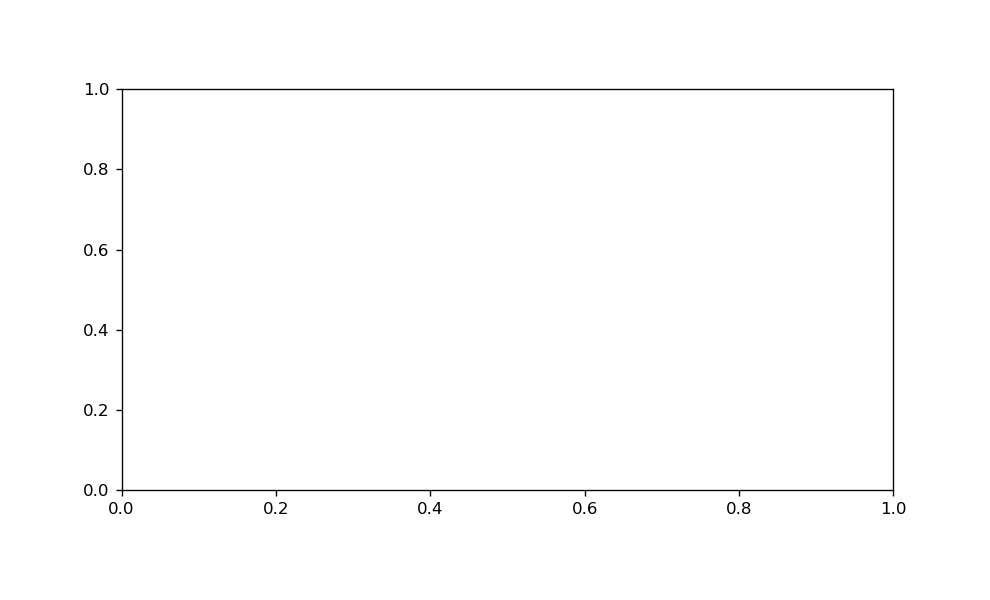

Output()

In [14]:
fig, ax = plt.subplots(figsize=(8.25, 5), dpi=120)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_T_fmulti   = widgets.FloatSlider(value=1,   min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
y_T_KKmulti  = widgets.FloatSlider(value=0.01,min=0., max=0.02, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
y_T_rmulti   = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')

y_X_r = 1
    
def need(y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):
    ax.cla()
    
    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    y_T_f   = y_T_fmulti   * y_X_r
    y_T_KK  = y_T_KKmulti  * y_X_r
    y_T_r   = y_T_rmulti   * y_X_r

    #數值解
    globals()['TR'] = []
    for l in np.linspace(0, 6, 7):
        A = np.array([[-(y_l0_KK*(np.abs(l)+1)+y_X_r+y_X_f+y_T_f), y_l0_KK*(np.abs(l)+1), 0, 0, 0, 0],
                     [y_l0_KK*(np.abs(l)+1), -(y_l0_KK*(np.abs(l)+1)+y_X_r+y_X_f+y_T_f), 0, 0, 0, 0],
                     [y_X_f, 0, -(y_X0_KK+y_X_r+y_T_f), y_X0_KK, 0, 0],
                     [0, y_X_f, y_X0_KK, -(y_X0_KK+y_X_r+y_T_f), 0, 0],
                     [y_T_f, 0, y_T_f, 0, -(y_T_KK+y_T_r), y_T_KK],
                     [0, y_T_f, 0, y_T_f, y_T_KK, -(y_T_KK+y_T_r)]])
        print('for l = ',l, '\nthe matrix A is\n',A)
        b = np.array([-1, 0, 0, 0, 0, 0])
        print('and the matrix b is\n',b,'\n----------------------------')
        ans = np.linalg.inv(A).dot(b)
        TR_DoVP_solution = (ans[4]-ans[5])/(ans[4]+ans[5])
        globals()['TR'] += [TR_DoVP_solution]
    #繪製數值解
    ax.plot( np.linspace(0, 6, 7), globals()['TR'], 'kx', markersize=10, zorder=3)
    
    globals()['TR'] = []
    for l in range(0,7,1):
        globals()['TR']   += [model_three_trion_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r)]

    ax.plot( np.linspace(0, 6, 7), globals()['TR'], marker='o', linestyle='dotted', markersize=8, color='mediumseagreen' ,linewidth=1, zorder=2)
    
    for j, v in enumerate(globals()['TR']):
        ax.text(j+0.4, v-0.08, "%2.2f" %v, ha="center", fontsize=20)


    #圖片設置
    ax.grid()
    ax.set_ylabel('DoVP', fontsize=20, rotation=90)
    ax.set_yticks(np.arange(0, 1.01, 1./10))
    ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    ax.set_ylim(0, 1)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(0, 6, 7), [' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(0, 6, 7), ['0', '1', '2', '3', '4', '5', '6'])
    # ax.set_xlim(-0.5, 6.5)
    ax.set_xlim(-0.2, 6.8)
    ax.legend(['numerical $η^{T,\ell}_{\sf{Model-III}}$','$η^{T}_{\sf{Model-III}}$'], fontsize=16, loc='lower left')
    ax.tick_params(axis='both', which='major', labelsize=20)
    

plt.tight_layout(pad=5)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )

# Tight focusing 

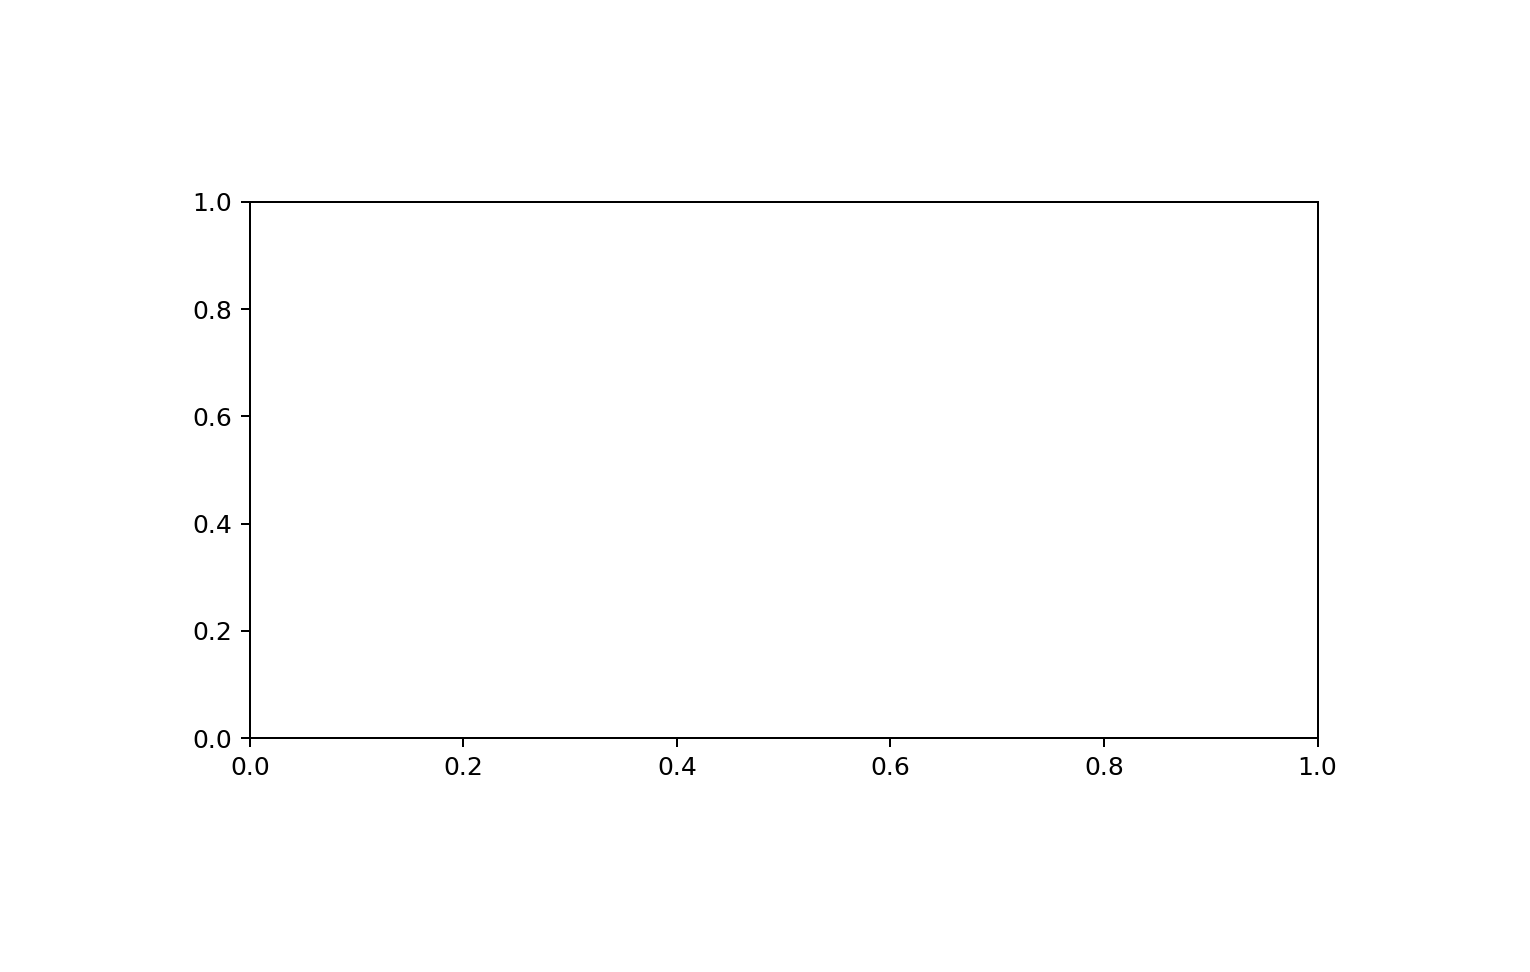

Output()

In [17]:
fig, ax = plt.subplots(figsize=(8.5, 5.4), dpi=180)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=50,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_T_fmulti   = widgets.FloatSlider(value=1,   min=0., max=5,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
y_T_KKmulti  = widgets.FloatSlider(value=0.01,min=0., max=0.01, step=1/1000001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
y_T_rmulti   = widgets.FloatSlider(value=0.1, min=0., max=0.5, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')

y_X_r = 1

# GK = []
# GKprime = []
GKinRCP = [90.04, 91.57, 93.10, 94.63, 96.16, 97.70, 99.27, 91.69, 91.58, 90.80, 89.48, 88.07, 86.61]
GKprimeinRCP = [1.37, 0.99, 0.67, 0.42, 0.23, 0.10, 0.02, 0.19, 1.33, 1.20, 1.49, 1.89, 2.36]

GKinLCP = [2.36, 1.89, 1.49, 1.20, 1.33, 0.19, 0.02, 0.10, 0.23, 0.42, 0.67, 0.99, 1.37]
GKprimeinLCP = [86.61, 88.07, 89.48, 90.80, 91.58, 91.69, 99.27, 99.70, 96.16, 94.63, 93.10, 91.57, 90.04]
    
all_one = []
GratioR = []
GratioL = []
for i in range(13):
    GratioR += [(GKinRCP[i]-GKprimeinRCP[i])/(GKinRCP[i]+GKprimeinRCP[i])]
    GratioL += [np.abs((GKinLCP[i]-GKprimeinLCP[i])/(GKinLCP[i]+GKprimeinLCP[i]))]

    all_one += [np.abs(-1)]
    
def need(y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):

    ax.cla()

    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    y_T_f   = y_T_fmulti   * y_X_r
    y_T_KK  = y_T_KKmulti  * y_X_r
    y_T_r   = y_T_rmulti   * y_X_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_X0_KK = "+str(format(y_X0_KK,'.2f')))
    print("y_X_f = "+str(format(y_X_f,'.2f')))
    print("y_T_f = "+str(format(y_T_f,'.2f')))
    print("y_T_KK = "+str(format(y_T_KK,'.5f')))
    print("y_T_r = "+str(format(y_T_r,'.5f')))
    
    #數值解
    globals()['TR_RCP'] = []
    globals()['TR_LCP'] = []
    for l in np.linspace(-6, 6, 13):
        A = np.array([[-(y_l0_KK*(np.abs(l)+1)+y_X_r+y_X_f+y_T_f), y_l0_KK*(np.abs(l)+1), 0, 0, 0, 0],
                     [y_l0_KK*(np.abs(l)+1), -(y_l0_KK*(np.abs(l)+1)+y_X_r+y_X_f+y_T_f), 0, 0, 0, 0],
                     [y_X_f, 0, -(y_X0_KK+y_X_r+y_T_f), y_X0_KK, 0, 0],
                     [0, y_X_f, y_X0_KK, -(y_X0_KK+y_X_r+y_T_f), 0, 0],
                     [y_T_f, 0, y_T_f, 0, -(y_T_KK+y_T_r), y_T_KK],
                     [0, y_T_f, 0, y_T_f, y_T_KK, -(y_T_KK+y_T_r)]])
        # print('for l = ',l, '\nthe matrix A is\n',A)
        b_RCP = np.array([-GKinRCP[int(l+6)], -GKprimeinRCP[int(l+6)], 0, 0, 0, 0])
        # print('and the matrix b (RCP) is\n',b_RCP,'\n----------------------------')
        ans = np.linalg.inv(A).dot(b_RCP)
        TR_RCP_DoVP_solution = np.abs((ans[4]-ans[5])/(ans[4]+ans[5]))
        globals()['TR_RCP'] += [TR_RCP_DoVP_solution]

        # print('for l = ',l, '\nthe matrix A is\n',A)
        b_LCP = np.array([-GKinLCP[int(l+6)], -GKprimeinLCP[int(l+6)], 0, 0, 0, 0])
        # print('and the matrix b (LCP) is\n',b_LCP,'\n----------------------------')
        ans = np.linalg.inv(A).dot(b_LCP)
        TR_LCP_DoVP_solution = np.abs((ans[4]-ans[5])/(ans[4]+ans[5]))
        globals()['TR_LCP'] += [TR_LCP_DoVP_solution]
    #繪製數值解
    ax.plot( np.linspace(-6, 6, 13), globals()['TR_RCP'], 'rX', markeredgecolor='k', markersize=7, zorder=3)
    ax.plot( np.linspace(-6, 6, 13), globals()['TR_LCP'], 'bX', markeredgecolor='k', markersize=7, zorder=3)
    
    globals()['TR_without_TF'] = []
    globals()['TR_R'] = []
    globals()['TR_L'] = []
    for l in range(-6,7,1):
        globals()['TR_without_TF'] += [model_three_trion_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r) * all_one[l+6]]
        globals()['TR_R']    += [model_three_trion_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r) * GratioR[l+6]]
        globals()['TR_L']    += [model_three_trion_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r) * GratioL[l+6]]
    
    ax.plot( np.linspace(-6, 6, 13), globals()['TR_without_TF'], marker='x', linestyle='solid', markersize=8, markeredgecolor='black', color='black' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(-6, 6, 13), globals()['TR_R'], marker='o', linestyle='dotted', markersize=8, color='red' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(-6, 6, 13), globals()['TR_L'], marker='o', linestyle='dotted', markersize=8, color='blue' ,linewidth=1, zorder=2)
        
    globals()['TR_without_TF_for_text'] = []
    for L in range(-6,7,2):
        globals()['TR_without_TF_for_text'] += [model_three_trion_fun(L, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r)* all_one[l+6]]
    for j, v in enumerate(globals()['TR_without_TF_for_text']):
        ax.text((j-3)*2, v+0.005, "%2.3f" %v, ha="center", fontsize=12)
        
    globals()['TR_R_for_text'] = []
    for L in range(-6,7,2):
        globals()['TR_R_for_text']            += [model_three_trion_fun(L, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r) * GratioR[L+6]]
    for j, v in enumerate(globals()['TR_R_for_text']):
        ax.text((j-3)*2, v-0.011, "%2.3f" %v, ha="center", fontsize=12)
        
    globals()['TR_L_for_text'] = []
    for L in range(-6,7,2):
        globals()['TR_L_for_text']            += [model_three_trion_fun(L, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r) * GratioL[L+6]]
    for j, v in enumerate(globals()['TR_L_for_text']):
        ax.text((j-3)*2, v-0.011, "%2.3f" %v, ha="center", fontsize=12)
  
    ax.grid()
    # ax.set_title('Trion DoVP for LCP case', fontsize=16)
    ax.set_ylabel('$|η^{T}_{\sf{Model-III}}|$', fontsize=20, rotation=90)
    ax.set_yticks(np.arange(0.63, 0.77, 0.02))
    # ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    ax.set_ylim(0.63, 0.77)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(-6, 6, 13), [' ', ' ', ' ', ' ', ' ', ' ',' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(-6, 6, 13), ['-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6'])
    ax.set_xlim(-6.8, 6.8)
    ax.legend(["numerical w/ tight focusing (RCP)","numerical w/ tight focusing (LCP)", "w/o tight focusing", "w/ tight focusing (RCP)", "w/ tight focusing (LCP)"], fontsize=12, loc='lower center')
    ax.tick_params(axis='both', which='major', labelsize=14)
    

plt.tight_layout(pad=7.7)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )